In [1]:
!unzip '/content/drive/MyDrive/Fertilizers_Recommendation_ System_For_Disease_ Prediction.zip'

Streaming output truncated to the last 5000 lines.
  inflating: Dataset Plant Disease/Veg-dataset/Veg-dataset/train_set/Tomato___Bacterial_spot/d8914e04-4e33-4189-bfa9-f547e5f696d1___GCREC_Bact.Sp 3173.JPG  
  inflating: Dataset Plant Disease/Veg-dataset/Veg-dataset/train_set/Tomato___Bacterial_spot/d8a64b79-e21e-4158-9d9d-47bd6e44fba0___GCREC_Bact.Sp 3594.JPG  
  inflating: Dataset Plant Disease/Veg-dataset/Veg-dataset/train_set/Tomato___Bacterial_spot/d8a90b81-eb30-461d-80ba-4fa9c93f379d___GCREC_Bact.Sp 3757.JPG  
  inflating: Dataset Plant Disease/Veg-dataset/Veg-dataset/train_set/Tomato___Bacterial_spot/d8b6f17a-5189-47ae-904f-be4a09dce0ad___UF.GRC_BS_Lab Leaf 9009.JPG  
  inflating: Dataset Plant Disease/Veg-dataset/Veg-dataset/train_set/Tomato___Bacterial_spot/d8d2baf6-87de-43e5-bd40-48dfe33841d3___GCREC_Bact.Sp 5747.JPG  
  inflating: Dataset Plant Disease/Veg-dataset/Veg-dataset/train_set/Tomato___Bacterial_spot/d8d3c759-4242-42c0-9be5-b3177f2664be___GCREC_Bact.Sp 5953.JPG  
  

In [32]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


(([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>))

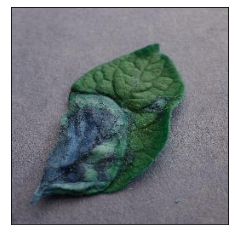

In [33]:
img = cv2.imread('/content/Dataset Plant Disease/Veg-dataset/Veg-dataset/train_set/Potato___Late_blight/0051e5e8-d1c4-4a84-bf3a-a426cdad6285___RS_LB 4640.JPG')
plt.imshow(img,cmap='gray'),plt.grid(False)
plt.xticks([]),plt.yticks([])


Text(0, 0.5, 'Frequency')

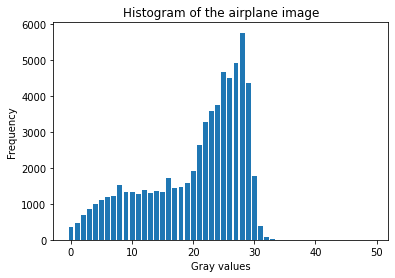

In [34]:
hist = cv2.calcHist([img],[0],None,[50],[0,256])

#different methods for displaying a histogram
plt.bar(range(50),hist.ravel())
plt.title('Histogram of the airplane image')
plt.xlabel('Gray values')
plt.ylabel('Frequency')

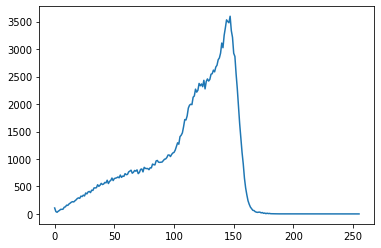

In [36]:
#Another method 
hist,bins = np.histogram(img.ravel(),256,[0,256])
plt.plot(hist)

In [39]:
#Let's read two other images
high = cv2.imread('/content/Dataset Plant Disease/Veg-dataset/Veg-dataset/train_set/Potato___Late_blight/00b1f292-23dd-44d4-aad3-c1ffb6a6ad5a___RS_LB 4479.JPG')
low = cv2.imread('/content/Dataset Plant Disease/Veg-dataset/Veg-dataset/train_set/Potato___Late_blight/0085ef03-aec3-431a-99a1-de286e10c0cf___RS_LB 2949.JPG')


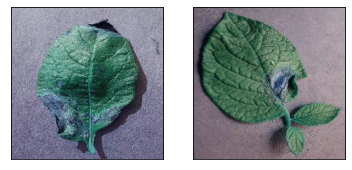

In [40]:
plt.subplot(121),plt.imshow(high)
plt.grid(False),plt.xticks([]),plt.yticks([])

plt.subplot(122),plt.imshow(low)
plt.grid(False),plt.xticks([]),plt.yticks([])
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


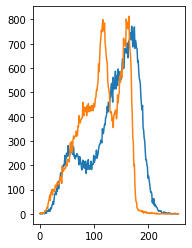

In [41]:
#calculate histogra of both images for the last channel.
#channels can differ from 0 to 2.
hist_high = cv2.calcHist([high], [2],None,[256],[0,256])
hist_low = cv2.calcHist([low],[2],None,[256],[0,256])

#plot histograms
plt.subplot(122)
plt.plot(hist_high)

plt.subplot(122)
plt.plot(hist_low)

plt.show()

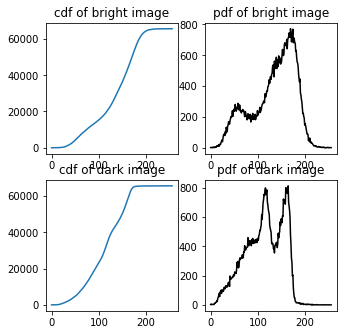

In [42]:
cdf_low = hist_low.cumsum()
cdf_high = hist_high.cumsum()

#plot cumulative histograms
plt.subplot(221),plt.plot(cdf_high),plt.title('cdf of bright image')
plt.subplot(222),plt.plot(hist_high,'k'),plt.title('pdf of bright image')

plt.subplot(223),plt.plot(cdf_low),plt.title('cdf of dark image')
plt.subplot(224),plt.plot(hist_low,'k'),plt.title('pdf of dark image')

#adjust the placement of subplots
plt.subplots_adjust(bottom=2,right=0.8,top=3)

plt.show()

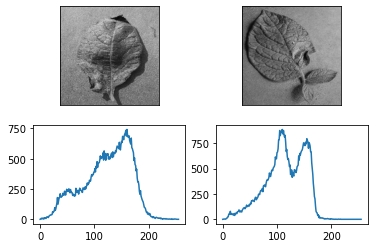

In [43]:
low_gray = cv2.cvtColor(low,cv2.COLOR_BGR2GRAY)
high_gray = cv2.cvtColor(high,cv2.COLOR_BGR2GRAY)
#show images and their histograms

plt.subplot(221),plt.imshow(high_gray,cmap='gray')
plt.grid(False),plt.xticks([]),plt.yticks([])
plt.subplot(223),plt.plot(cv2.calcHist([high_gray],[0],None,[256],[0,256]))

plt.subplot(222),plt.imshow(low_gray,cmap='gray')
plt.grid(False),plt.xticks([]),plt.yticks([])
plt.subplot(224),plt.plot(cv2.calcHist([low_gray],[0],None,[256],[0,256]))

plt.show()

In [44]:
#Define a function to easily handle manipulation.
def manip_image(image,alpha,beta):

   new_image = np.zeros(image.shape,image.dtype)

   for y in range(image.shape[0]):
      for x in range(image.shape[1]):
        new_image[y,x]= np.clip(alpha*image[y,x]+beta,0,255)
  
   return new_image

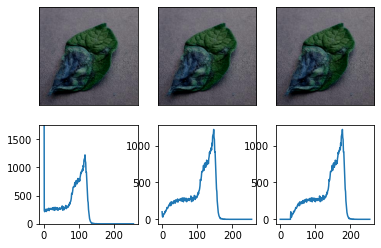

In [45]:
bright = manip_image(img,1,30)
dark = manip_image(img,1,-30)

#compare the results
plt.figure()
plt.subplot(231),plt.imshow(dark,cmap='gray')
plt.grid(False),plt.xticks([]),plt.yticks([])

plt.subplot(232),plt.imshow(dark,cmap='gray')
plt.grid(False),plt.xticks([]),plt.yticks([])

plt.subplot(233),plt.imshow(dark,cmap='gray')
plt.grid(False),plt.xticks([]),plt.yticks([])

plt.subplot(234)
plt.plot(cv2.calcHist([dark],[0],None,[256],[0,256])),plt.ylim((0,1750))

plt.subplot(235)
plt.plot(cv2.calcHist([img],[0],None,[256],[0,256]))

plt.subplot(236)
plt.plot(cv2.calcHist([bright],[0],None,[256],[0,256]))

([<matplotlib.lines.Line2D at 0x7f9fb0fda050>], (0.0, 1100.0))

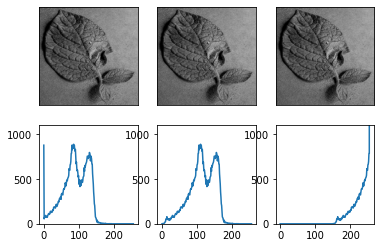

In [46]:
#Test on the dark image 
l_bright = manip_image(low_gray,1,150)
l_dark = manip_image(low_gray,1,-25)

#Compare the results
plt.figure()
plt.subplot(231),plt.imshow(l_dark,cmap='gray')
plt.grid(False),plt.xticks([]),plt.yticks([])

plt.subplot(232),plt.imshow(l_dark,cmap='gray')#
plt.grid(False),plt.xticks([]),plt.yticks([])

plt.subplot(233),plt.imshow(l_dark,cmap='gray')
plt.grid(False),plt.xticks([]),plt.yticks([])

plt.subplot(234)
plt.plot(cv2.calcHist([l_dark],[0],None,[256],[0,256])),plt.ylim((0,1100))

plt.subplot(235)
plt.plot(cv2.calcHist([low_gray],[0],None,[256],[0,256])),plt.ylim((0,1100))

plt.subplot(236)
plt.plot(cv2.calcHist([l_bright],[0],None,[256],[0,256])),plt.ylim((0,1100))


(0.0, 1750.0)

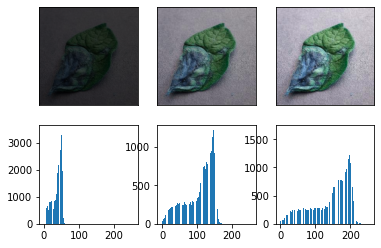

In [47]:
#Test on the  image 
increase_contrast = manip_image(img,1.35,0)
decrease_contrast  = manip_image(img,0.35,0)

#Compare the results
plt.figure()
plt.subplot(231),plt.imshow(decrease_contrast,cmap='gray')
plt.grid(False),plt.xticks([]),plt.yticks([])

plt.subplot(232),plt.imshow(img,cmap='gray')
plt.grid(False),plt.xticks([]),plt.yticks([])

plt.subplot(233),plt.imshow(increase_contrast,cmap='gray')
plt.grid(False),plt.xticks([]),plt.yticks([])

plt.subplot(234)
plt.bar(range(256),
        cv2.calcHist([decrease_contrast],[0],None,[256],[0,256]).ravel())

plt.subplot(235)
plt.bar(range(256),
        cv2.calcHist([img],[0],None,[256],[0,256]).ravel())

plt.subplot(236)
plt.bar(range(256),
        cv2.calcHist([increase_contrast],[0],None,[256],[0,256]).ravel())
plt.ylim((0,1750))

In [48]:
img_eq = cv2.equalizeHist(img)

grid = plt.GridSpec(3,4, wspace=0.4, hspace=0.3)

plt.subplot(grid[:2,2])
plt.imshow(img,cmap='gray')
plt.grid(False), plt.xticks([]), plt.yticks([])

plt.subplot(grid[:2,2])
plt.imshow(img,cmap='gray')
plt.grid(False), plt.xticks([]), plt.yticks([])

plt.subplot(grid[:2,2])
plt.imshow(img,cmap='gray')
plt.grid(False), plt.xticks([]), plt.yticks([])

plt.subplot(grid[:2,2])
plt.bar(range(256),
        cv2.calcHist([img],[0],None,[256],[0,256]).ravel())

plt.subplot(grid[:2,2])
plt.bar(range(256),
        cv2.calcHist([img_eq],[0],None,[256],[0,256]).ravel())


error: ignored

In [49]:
clahe = cv2.createCLAHE(clipLimit=2.0,tileGridSize=(16,16))
img_cl = clahe.apply(img)

grid = plt.GridSpec(3,4,wspace=0.4,hspace=0.3)

plt.subplot(grid[:2,:2])
plt.imshow(img,cmap='gray')
plt.grid(False),plt.xticks([]),plt.yticks([])

plt.subplot(grid[:2,:2])
plt.imshow(img,cmap='gray')
plt.grid(False),plt.xticks([]),plt.yticks([])

plt.subplot(grid[:2,:2])
plt.bar(range(256),
        cv2.calcHist([img],[0],None,[256],[0,256]).ravel())

plt.subplot(grid[:2,:2])
plt.bar(range(256),
        cv2.calcHist([img],[0],None,[256],[0,256]).ravel())


error: ignored